In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
BreastCancer = pd.read_csv('Breast-Cancer.csv')

In [3]:
BreastCancer.head(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
BreastCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [11]:
columns_to_drop = ["HOMA", "Leptin", "Adiponectin", "Resistin", "MCP.1", "Classification"]
BreastCancer.drop(columns=columns_to_drop, inplace=True)
BreastCancer.isnull().sum()

Age        0
BMI        0
Glucose    0
Insulin    0
dtype: int64

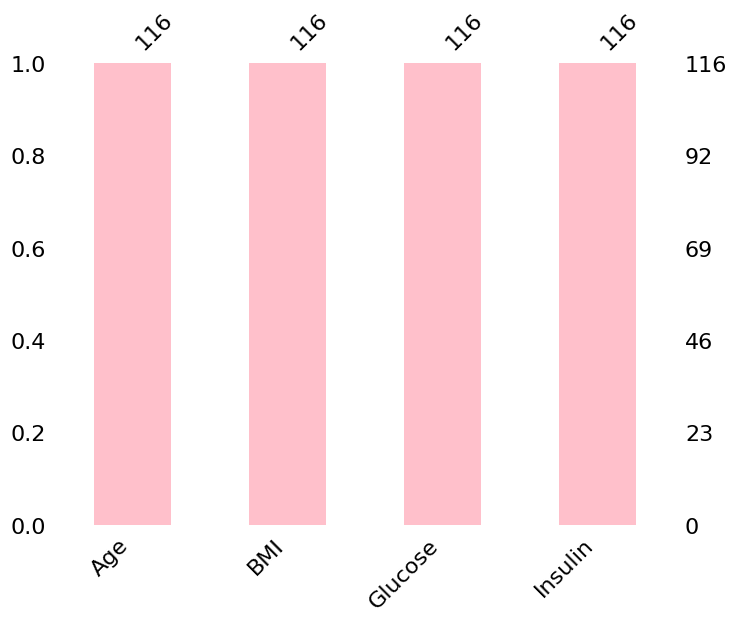

In [12]:
import missingno as msno
msno.bar(BreastCancer, figsize =(8,6), color="pink")
plt.show()

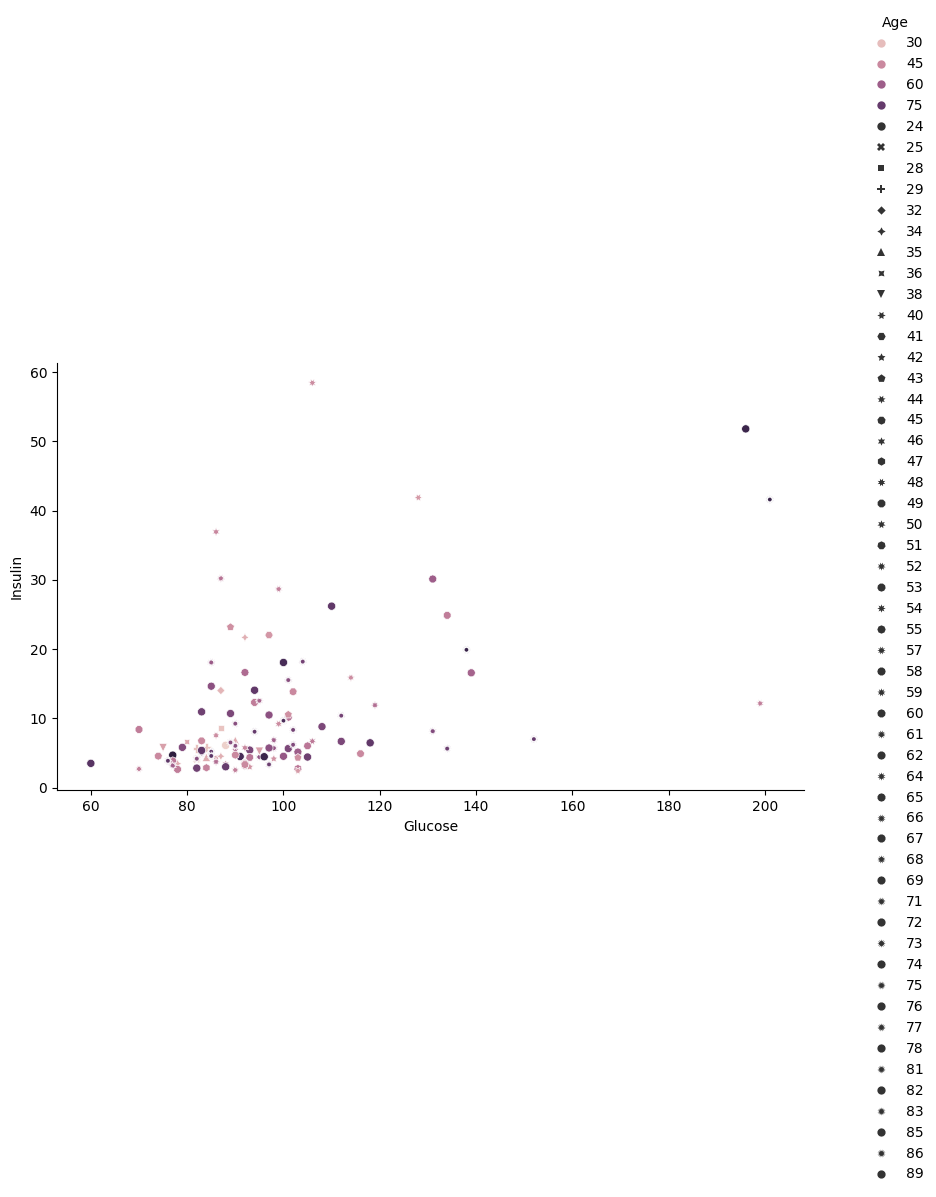

In [13]:
g=sns.relplot(x='Glucose', y='Insulin', data=BreastCancer, hue='Age', style='Age')
g.fig.set_size_inches(10,5)
plt.show()

In [14]:
numeric_columns = BreastCancer.select_dtypes(include=[float, int]).columns
BreastCancer_numeric = BreastCancer[numeric_columns]
correlation_matrix = BreastCancer_numeric.corr()
print(correlation_matrix)

              Age       BMI   Glucose   Insulin
Age      1.000000  0.008530  0.230106  0.032495
BMI      0.008530  1.000000  0.138845  0.145295
Glucose  0.230106  0.138845  1.000000  0.504653
Insulin  0.032495  0.145295  0.504653  1.000000


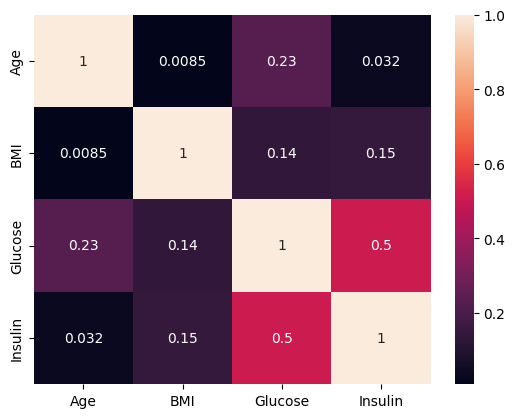

In [15]:
sns.heatmap(correlation_matrix, annot=True, color='pink')
plt.show()